<h1>Lab : simplified JPEG encoder/decoder</h1>

# VERY IMPORTANT: Take time to read the guidance before coding.

**Read the guidance**

**Read the topic (.pdf file) first**

**Functions to be implemented:**
  - rlencode (in Section 1)
  - count_symbols (in Section 1)
  - and also the 'main' functions (in Section 3)

**Some given functions:** (in Section 2)
  - zigzag
  - functions related to Huffman coding, such as ``construct_huffman_table, encode_huffman, decode_huffman``

**Some useful functions:**
  - imshow()
  - img = cv2.cvtColor(imgOriginal, cv2.COLOR_BGR2GRAY)
  - cv2.dct

# **You can directly go to Section 3 and code there**

**Import the libs**

In [1]:
import numpy as np
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from typing import List, Tuple, Any, Dict, Optional

import cv2

def show(img:np.ndarray):
    im = Image.fromarray(img)
    print(im.size, im.mode, im.format, img.min(),  img.max())
    display(im)

def load_from_url(url: str) -> np.ndarray:
    return np.asarray(Image.open(requests.get(url, stream=True).raw))

def debug_ndarray(arr:np.ndarray, name:str='') -> None:
    print(name, arr.shape, arr.dtype, arr.min(), arr.max())

def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

# 1. Functions to be implemented

*   rlencode: Run length coding
*   count_symbols: this will be used for Huffman coding
*   zigzag: Implementing this function is optional, as there is a relatively simple 'manual' method available for accomplishing the task (see the begining of Section 3)
# *   **Note: however, you dont need to implement these functions immediately. You can go to Section 3 to implement different first steps of JPEG: block devivision, centering, DCT, quantification.**





In [ ]:
def zigzag(matrix: np.ndarray) -> np.ndarray:
    """
    computes the zigzag of a quantized block
    :param numpy.ndarray matrix: quantized matrix
    :returns: zigzag vectors in an array
    """
    # initializing the variables
    h = 0
    v = 0
    v_min = 0
    h_min = 0
    v_max = matrix.shape[0]
    h_max = matrix.shape[1]
    i = 0
    output = np.zeros((v_max * h_max))

    while (v < v_max) and (h < h_max):
        if ((h + v) % 2) == 0:  # going up
            if v == v_min:
                output[i] = matrix[v, h]  # first line
                if h == h_max:
                    v = v + 1
                else:
                    h = h + 1
                i = i + 1
            elif (h == h_max - 1) and (v < v_max):  # last column
                output[i] = matrix[v, h]
                v = v + 1
                i = i + 1
            elif (v > v_min) and (h < h_max - 1):  # all other cases
                output[i] = matrix[v, h]
                v = v - 1
                h = h + 1
                i = i + 1
        else:  # going down
            if (v == v_max - 1) and (h <= h_max - 1):  # last line
                output[i] = matrix[v, h]
                h = h + 1
                i = i + 1
            elif h == h_min:  # first column
                output[i] = matrix[v, h]
                if v == v_max - 1:
                    h = h + 1
                else:
                    v = v + 1
                i = i + 1
            elif (v < v_max - 1) and (h > h_min):  # all other cases
                output[i] = matrix[v, h]
                v = v + 1
                h = h - 1
                i = i + 1
        if (v == v_max - 1) and (h == h_max - 1):  # bottom right element
            output[i] = matrix[v, h]
            break
    return output


def rlencode(data:list, symbol:int=0, escape=257) -> np.ndarray:
    '''
    Encode a list of values using run length encoding
    when `symbol` is encountered,
    the next value is `escape` followed by the number of `symbol`.
    '''
    out = []
    ###
    #TODO
    ###
    return np.array(out)

def count_symbols(data:list) -> Dict[Any, int]:
    '''
    Compute the frequency of each value in the list
    '''
    freq = {}
    ###
    #TODO
    ###
    return freq


#testing
freq = count_symbols([0, 0, 0, 0, 1, 1, 1, 2, 2, 3])
print(freq)
#'output: {0: 4, 1: 3, 2: 2, 3: 1}'


#2. Given functions

**Huffman tree**

To obtain the Huffman code, it is necessary to construct a (binary) Huffman tree.
This tree is constructed from a list of leaves (symbols) and internal nodes (sum of the weights of the children).
Each node is associated with a value which is the sum of the values of its children.
The leaves correspond to symbols and are associated with their number of occurrences in the vector.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Huffman_tree_2.svg/1200px-Huffman_tree_2.svg.png" width=500>

Huffman encoding involves counting the number of occurrences of each character in a sentence and representing each character as a leaf node on a tree with a weight equal to its occurrence count. The tree is constructed by combining the two nodes with the lowest weights at each step until only one node, the root of the tree, remains.

In [6]:
def compute_huffman_tree(data:list, freq:Optional[dict]=None) -> Tuple[int, Any, Any]:
    '''
    Compute a huffman tree from a frequency table of values
    Return the root node of the tree
    '''
    if freq is None:
        freq: Dict[Any, int] = count_symbols(data)

    # create a list of nodes
    nodes = []
    for symbol, freq in freq.items():
        nodes.append((freq, symbol))

    # sort the list of nodes by count
    nodes.sort(key=lambda x: x[0])

    # create a tree
    while len(nodes) > 1:
        # get the two lowest frequency nodes
        left, right = nodes[:2]

        # create a new node with the sum of the frequencies
        new_node_count = left[0] + right[0]
        new_node = (new_node_count, left, right)
        # remove the two lowest frequency nodes
        nodes = nodes[2:]
        # insert the new node
        nodes.append(new_node)
        # sort the nodes by frequency
        nodes.sort(key=lambda x: x[0])

    # return the root node
    return nodes[0]

sentence = "this is an example of a huffman tree"
#convert sentence to list of characters
data = list(sentence)
from pprint import pprint

data_tree = compute_huffman_tree(data)
pprint(data_tree)

NameError: name 'count_symbols' is not defined

**Huffman coding table**

Read and test the following functions

In [ ]:
def display_table(lines, code:dict, sep='\t'):
    '''
    Display a table of data with columns aligned
    '''
    cols_width = [max(len(str(x)) for x in col) for col in zip(*lines)]
    for line in lines:
        # adjust each column to its max width
        print(*[x.rjust(w) for x, w in zip(line, cols_width)], sep=sep)

def display_huffman_table(data, code:dict, sep='\t'):
    counts: dict = count_symbols(data)
    total = sum(counts.values())
    lines = [('Symbol', 'Code', 'Count', 'Frequency')]
    tmp = sorted(list(counts.keys()), key=lambda x: counts[x], reverse=True)
    for k in tmp:
        symbol = f"`{k}`"
        symbol_code = str(counts[k])
        count = str(code[k])
        freq = str(round(100 * counts[k] / total, 2))+'%'
        lines.append((symbol, symbol_code, count, freq))
    display_table(lines, code, sep=sep)

def bintree_to_table(node, path=None, left='0', right='1') -> Dict[str, str]:
    '''
    Build a huffman table from a huffman tree
    Return a dictionary of symbol:code
    '''
    if path is None:
        path = ''
    table = {}
    if len(node) == 2: # leaf node
        count, symbol = node
        table[symbol] = path
    else: # internal node
        node_left, node_right = node[1], node[2]
        left_path = bintree_to_table(node_left, path + left, left=left, right=right)
        right_path = bintree_to_table(node_right, path + right, left=left, right=right)
        table.update(left_path)
        table.update(right_path)

    return table

sentence = "this is an example of a huffman tree"
#convert sentence to list of characters
data = list(sentence)
data_tree = compute_huffman_tree(data)
data_table = bintree_to_table(data_tree)

# display the huffman table
display_huffman_table(data, data_table)


***Take time to test the three following functions, you will use them for Huffman codage/decodage***

In [ ]:
def construct_huffman_table(data:list) -> dict:
    '''
    Encode a list of values using huffman encoding and return the huffman table
    '''
    counts = count_symbols(data)
    tree = compute_huffman_tree(counts)
    table = bintree_to_table(tree)
    return table

def encode_huffman(data: list, table: dict) -> str:
    '''
    Encode a list of values using the huffman table dictionary
    Return the encoded string
    '''
    out = []
    for i in data:
        out.extend(table[i])
    out = ''.join(out) # list to string
    return out

def decode_huffman(encoded:str, table: dict) -> np.ndarray:
    '''
    Decode a list of values using huffman code dictionary
    '''
    data = []
    i = 0
    while i < len(encoded):
        for k, v in table.items():
            if encoded[i:].startswith(v): # prefix match
                data.append(k)
                i += len(v)
                break
    return np.array(data)

# testing
sentence = "this is an example of a huffman tree"
#convert sentence to list of characters
data = list(sentence)
table = construct_huffman_table(data)
print("Test 1")
print(table)

# Testing
print("Test 2")
data = [0, 1, 0, 0, 0, 0, 0, 2, 0, 4, 4, 2, 3]
data_table = construct_huffman_table(data)
print('Original :', data)

encoded = encode_huffman(data, data_table)
print('Encoded  :', encoded)

decoded = decode_huffman(encoded, data_table)
print('Decoded  :', decoded)


#3. TODO: Codage/Decodage

In [ ]:
# ZigZag example

# This will be used for of ZigZag...
col = np.array([1, 2, 1, 1, 2, 3, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5,
                6, 7, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 6, 7, 8, 8, 7, 8])

lig = np.array([1, 1, 2, 3, 2, 1, 1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 1, 2,
                3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 5, 6, 7, 8, 8, 7, 6, 7, 8, 8])

rdMatrix = np.round(np.random.rand(8,8)*10)

out = np.zeros(64)
for k in range(64):
    out[k] = rdMatrix[lig[k]-1,col[k]-1] # -1 since indexes start from 0 in Python...

print(rdMatrix)
print(out)


(256, 256) RGB None 0 255


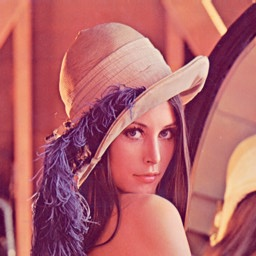

In [3]:
# define quantization tables
qY = np.array([[16, 11, 10, 16, 24, 40, 51, 61],  # luminance quantization table
                [12, 12, 14, 19, 26, 48, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]])

qC = np.array([[17, 18, 24, 47, 99, 99, 99, 99],  # chrominance quantization table
                [18, 21, 26, 66, 99, 99, 99, 99],
                [24, 26, 56, 99, 99, 99, 99, 99],
                [47, 66, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99]])

# read an image and show it
url = "http://www.lenna.org/len_std.jpg"
imgOriginal = load_from_url(url)
show(imgOriginal)

#TODO: show different channels

Conversion de l'espace RGB à l'espace luminance/chrominance

In [4]:
print(imgOriginal[:,:,1])

[[135 135 136 ... 139 144 120]
 [136 136 136 ... 150 151 116]
 [135 135 135 ... 130 122  88]
 ...
 [ 25  30  29 ...  55  62  65]
 [ 25  28  27 ...  64  68  68]
 [ 22  25  26 ...  72  77  77]]


In [7]:
pprint(imgOriginal)
transform_matrix=np.array([[0.299,0.587,0.114],[-0.1687,-0.3313,0.5],[0.5,-0.4187,-0.0813]]).T
print(transform_matrix)
column_matrix=np.array([0,128,128])

def color_conversion(RGB_matrix):
    """RGB_matrix consists of 3 coefficients of color value
    """
    #Initialization of returned matrix
    YCbCr=np.zeros(np.shape(RGB_matrix))

    YCbCr=np.dot(RGB_matrix,transform_matrix)+column_matrix

    return YCbCr

def image_YCbCr_conversion(img):

    #Initialization of returned image
    YCbCr_img = np.zeros(np.shape(img))

    row,col,par=np.shape(img)
    
    for i in range(row):
        for j in range(col):
            YCbCr_img[i][j]=color_conversion(img[i][j])

    return YCbCr_img

print(image_conversion(imgOriginal))

array([[[225, 135, 124],
        [225, 135, 124],
        [226, 136, 125],
        ...,
        [235, 139, 125],
        [239, 144, 122],
        [214, 120,  94]],

       [[225, 136, 122],
        [225, 136, 122],
        [225, 136, 122],
        ...,
        [243, 150, 142],
        [243, 151, 138],
        [208, 116, 101]],

       [[227, 135, 120],
        [227, 135, 120],
        [227, 135, 120],
        ...,
        [219, 130, 132],
        [209, 122, 128],
        [173,  88,  93]],

       ...,

       [[ 89,  25,  60],
        [ 95,  30,  64],
        [ 96,  29,  64],
        ...,
        [144,  55,  75],
        [155,  62,  80],
        [159,  65,  81]],

       [[ 86,  25,  58],
        [ 92,  28,  62],
        [ 94,  27,  62],
        ...,
        [155,  64,  81],
        [164,  68,  80],
        [165,  68,  79]],

       [[ 83,  22,  55],
        [ 89,  25,  59],
        [ 93,  26,  59],
        ...,
        [164,  72,  87],
        [174,  77,  88],
        [177,  77,  87]]

NameError: name 'image_conversion' is not defined

Sous-échantillonage

In [ ]:
def matrix_half_reduction(matrix):
    """matrix is a 2D matrix"""
    try:
        row,col=np.shape(matrix)
    except:
        print("There is an error.")
    
    reduced_matrix=np.zeros((row//2,col//2))

    for i in range(0,row,2):
        for j in range(0,col,2):
            reduced_matrix[i//2][j//2]=matrix[i][j]

    return reduced_matrix

matrix=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print(np.column_stack((matrix,matrix[-1,:])))
print(matrix_half_reduction(matrix))

def img_chrominance_reduction(img):

    try:
        row,col,par=np.shape(img)
    except:
        print("There is an error.")

    Cr_matrix=img[:,:,1]
    Cb_matrix=img[:,:,2]

    Cr_reduced_matrix=matrix_half_reduction(Cr_matrix)
    Cb_reduced_matrix=matrix_half_reduction(Cb_matrix)

    return Cr_reduced_matrix,Cb_reduced_matrix

print(img_chrominance_reduction(imgOriginal))
    

Découpage par bloc

In [ ]:
#On travaille seulement sur les niveaux de gris.

def block_splitting(matrix):
    """matrix is a 2D matrix"""
    try:
        row,col=np.shape(matrix)
    except:
        print("There is an arror.")
    
    if row%8!=0 or col%8!=0:
        while row%8!=0:
            matrix=np.row_stack((matrix,matrix[-1,:]))
            row=np.shape(matrix)[0]
        while col%8!=0:
            matrix=np.column_stack((matrix,matrix[:,-1]))
            col=np.shape(matrix)[1]
    
    block_matrix=np.zeros((row//8,col//8))

    for i in range(row//8):
        for j in range(col//8):
            p=1
            #block_matrix[i,j]=matrix[i*8:(i+1)*8,j*8:(j+1)*8]
            print(matrix[i*8:(i+1)*8,j*8:(j+1)*8])

    #return block_matrix

block_splitting(matrix)


In [ ]:
# For students
# TODO: Write your 'main' code
# convert color image into gray image (or image in YCrCb space)

# This is just an example of coding, you can make your code differently

# ADVICE: create an other 'Code cell' and write/test your code gradually there
# since the code given here is not exectable yet

img = cv2.cvtColor(...)
# color
# First, you can work with only gray images for simplicity


width = len(img[0])
height = len(img)

#
img_gray = np.zeros((height, width), np.float32) + img[:, :, 0]
#

#show img_gray

# define block size

# compute number of blocks

# padding

# luminance channels

# for color images -----
# chrominance channels should be sub-sampled with different sub-sampling factors
# A very simple way: using a 2x2 averaging filter # another type of filter can be used
# then we can work with the sub-sampled version...
#--------------------

# define empty matrices to store Dct
# imgDct

# define empty matrices to store the quantized values
# imgQ


# This will be used for of ZigZag...
col = np.array([1, 2, 1, 1, 2, 3, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5,
                6, 7, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 6, 7, 8, 8, 7, 8])

lig = np.array([1, 1, 2, 3, 2, 1, 1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 1, 2,
                3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 5, 6, 7, 8, 8, 7, 6, 7, 8, 8])


ZZ_Blk = np.zeros(blockSize * blockSize) #1D

vRLC = []

size_vRLC = 0

#pseudo-code
for i in range('number of block'): #of course, this needs to be computed
    for j in range('number of block'):
        block = y[ ....]). # extract the block

        # dct
        # you can use something like imgDct['index'] = ...

        # quantification
        # you can use something like imgQ['index'] = ...

        # easy ZigZag Version 2:
        ZZ_Blk = ...#
        # zigzag (1D)

        # run length coding (1D)
        # can use `extend` function of numpy vRLC.extend()

#end for


# Huffman
mat_table: dict = construct_huffman_table...
mat_encoded: str = encode_huffman...

In [ ]:
# For testing a block, all steps (notably zigzag, rlc) are OK


**Compute compression rates at different stages**

In [ ]:
# number of bits in original image
H, W, C = img.shape


print(size_yRLC)

**Decodage**

In [ ]:
# Huffman decoding
decoded = decode_huffman...
print(len(decoded))

In [ ]:
print(decoded)

In [ ]:
decoded - yRLC